In [1]:
%%html

​

<script>

  function code_toggle() {

    if (code_shown){

      $('div.input').hide('500');

      $('#toggleButton').val('Show Code')

    } else {

      $('div.input').show('500');

      $('#toggleButton').val('Hide Code')

    }

    code_shown = !code_shown

  }

  

  $( document ).ready(function(){

    code_shown=false;

    $('div.input').hide()

  });

</script>

<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>



<img src="http://www.nserc-crsng.gc.ca/_gui/wmms.gif" alt="Canada logo" align="right">

<br>

<img src="http://www.triumf.ca/sites/default/files/styles/gallery_large/public/images/nserc_crsng.gif?itok=H7AhTN_F" alt="NSERC logo" align="right" width = 90>



# Explore historical funding over the NSERC [Evaluation Groups](http://www.nserc-crsng.gc.ca/NSERC-CRSNG/committees-comites/programs-programmes_eng.asp).


Canada's [Open Government Portal](http://open.canada.ca/en) includes [NSERC Awards Data](http://open.canada.ca/data/en/dataset/c1b0f627-8c29-427c-ab73-33968ad9176e) from 1995 through 2016.

The awards data (in .csv format) were copied to an [Amazon Web Services S3 bucket](http://docs.aws.amazon.com/AmazonS3/latest/dev/UsingBucket.html).

> **Acknowledgement:** This notebook was constructed using JupyterHub service from [syzygy.ca](http://syzygy.ca) with assistance from [Ian Allison](https://github.com/ianabc) and India Heisz. -- [James Colliander](http://colliand.com)

![](https://wwejubwfy.s3.amazonaws.com/NSERC_-_Selection_Committees_and_Evaluation_Groups_2018-04-12_14-37-32.png)

In [2]:
## Load some tools
import matplotlib.ticker as mtick
# import plotly.graph_objs as go
# import plotly.offline as py
# from plotly.offline import init_notebook_mode, iplot
#  import plotly.tools as tls
import matplotlib.pylab as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

In [3]:
## Thanks Ian Allison.
## Install some python libraries
import numpy as np
import pandas as pd
import sys

## Build a data frame with NSERC Awards Data by iteratively reading CSV files hosted on AWS S3.
## It would improve reproducibility if we imported from a definitive NSERC Awards Data.
df = pd.DataFrame()

startYear = 1995
endYear   = 2017  # The last year is not included, so 2017 means we include the 2016 collection but not 2017.

## some columns dropped here for convenience
for year in range(startYear, endYear):
    file = 'https://s3.ca-central-1.amazonaws.com/open-data-ro/NSERC/NSERC_GRT_FYR' + str(year) + '_AWARD.csv.gz'
    df = df.append(pd.read_csv(file, 
                               compression='gzip', 
                               usecols = [1, 2, 3, 4, 5, 7, 9, 11, 12, 13, 17, 28], 
                               encoding='latin-1'
                              )
                  )  
    print(year)
 

## Rename columns for better readability.
df.columns = ['Name', 'Department', 'OrganizationID',
                 'Institution', 'ProvinceEN', 'CountryEN',
                 'FiscalYear', 'AwardAmount', 'ProgramID',
                 'ProgramNameEN', 'Committee', 'ResearchSubjectEN']

## Strip out any leading or trailing whitespace in the ProgramID column
df['ProgramID'] = df['ProgramID'].str.strip();

1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


In [5]:
ctrms = df.loc[df['ProgramNameEN'] == "CTRMS"]

In [6]:
ctrms

,Name,Department,OrganizationID,Institution,ProvinceEN,CountryEN,FiscalYear,AwardAmount,ProgramID,ProgramNameEN,Committee,ResearchSubjectEN


In [13]:
ctrms = df.loc[df['ProgramID']=='CTRMS']

In [14]:
ctrms

,Name,Department,OrganizationID,Institution,ProvinceEN,CountryEN,FiscalYear,AwardAmount,ProgramID,ProgramNameEN,Committee,ResearchSubjectEN
1201,"Barlow, Martin",Mathematics,2,University of British Columbia,British Columbia,CANADA,2014,885500,CTRMS,Thematic Resources Support in Mathematics and ...,1579,Pure mathematics
4585,"Craig, Walter",Mathematics (St. George Campus),31,University of Toronto,Ontario,CANADA,2014,910500,CTRMS,Thematic Resources Support in Mathematics and ...,1579,Pure mathematics
22299,"Vinet, Luc",Physique,63,Université de Montréal,Québec,CANADA,2014,860500,CTRMS,Thematic Resources Support in Mathematics and ...,1579,Pure mathematics
1234,"Barlow, Martin",Mathematics,2,University of British Columbia,British Columbia,CANADA,2015,1160500,CTRMS,Thematic Resources Support in Mathematics and ...,1579,Pure mathematics
8823,"Hambleton, Ian",Mathematics (St. George Campus),31,University of Toronto,Ontario,CANADA,2015,1210500,CTRMS,Thematic Resources Support in Mathematics and ...,1579,Pure mathematics
22533,"Vinet, Luc",Physique,63,Université de Montréal,Québec,CANADA,2015,1160500,CTRMS,Thematic Resources Support in Mathematics and ...,1579,Pure mathematics
4455,"Colliander, James",Mathematics,2,University of British Columbia,British Columbia,CANADA,2016,1160500,CTRMS,Thematic Resources Support in Mathematics and ...,1579,Pure mathematics
7908,"Ghoussoub, Nassif",Mathematics,2,University of British Columbia,British Columbia,CANADA,2016,681000,CTRMS,Thematic Resources Support in Mathematics and ...,1579,Pure mathematics
8975,"Hambleton, Ian",Mathematics (St. George Campus),31,University of Toronto,Ontario,CANADA,2016,1210500,CTRMS,Thematic Resources Support in Mathematics and ...,1579,Pure mathematics
23081,"Vinet, Luc",Physique,63,Université de Montréal,Québec,CANADA,2016,1160500,CTRMS,Thematic Resources Support in Mathematics and ...,1579,Pure mathematics


Text(0,0.5,'Reported Dollars')

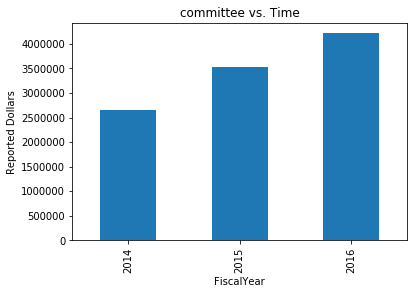

In [15]:
ax = ctrms.groupby(['FiscalYear']).sum()['AwardAmount'].plot(
    kind="bar", title="CTRMS vs. Time")
ax.set_ylabel("Reported Dollars")

In [16]:
ctrms.groupby(['FiscalYear']).sum()['AwardAmount']

FiscalYear
2014    2656500
2015    3531500
2016    4212500
Name: AwardAmount, dtype: int64

In [18]:
section = df.loc[df['Committee'] == 1508]

Text(0,0.5,'Reported Dollars')

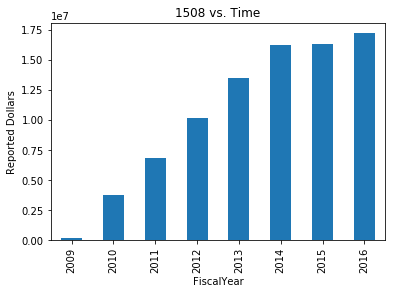

In [19]:
ax = section.groupby(['FiscalYear']).sum()['AwardAmount'].plot(
    kind="bar", title="1508 vs. Time")
ax.set_ylabel("Reported Dollars")

In [20]:
section.groupby(['FiscalYear']).sum()['AwardAmount']

FiscalYear
2009      217360
2010     3813412
2011     6834781
2012    10187618
2013    13480881
2014    16235610
2015    16354650
2016    17231868
Name: AwardAmount, dtype: int64

In [4]:
budget = pd.read_csv('./data/math-stats.csv')

In [16]:
budget['Total'] = budget['1508'] + budget['CTRMS']
budget['CTRMSdividedByTotal'] = budget['CTRMS']/budget['Total'] 
budget['Discrepancy'] = 0.19  - budget['CTRMSdividedByTotal'] 
budget['FundingGap'] = budget['Discrepancy'] * budget['Total']

In [17]:
budget

,Year,1508,CTRMS,Total,CTRMSdividedByTotal,Discrepancy,FundingGap
0,2014,16235610,2656500,18892110,0.140614,0.049386,933000.90
1,2015,16354650,3531500,19886150,0.177586,0.012414,246868.50
2,2016,17231868,4212500,21444368,0.196439,-0.006439,-138070.08


In [18]:
budget['FundingGap'].sum()

1041799.3200000006